# Good Afternoon Bluesky: REALLY starting your experiment (plan overnight script)

In this notebook you will:

* Prepare to collect data for analysis
* Assemble complex plans for single line exectution
* Create and test an "overnight" script
* Experience some guided troubleshooting for common errors


Recommend Prerequisites:

* [Hello Python and Jupyter](./Hello%20Python%20and%20Jupyter.ipynb)
* [Good Morning Bluesky](./Good%20Morning%20Bluesky.ipynb)

In [ ]:
#pip install -U --pre databroker[all]

<font color='green' size="6">Hosted by <font color='blue'><b>Josh</b></font></font>

## For Bluesky Session Continuity
Run the next cells to make the ipython kernel match the previous session


In [1]:
%run -i gm_user/user_profile.py

In [2]:
%run -i gm_user/user_startup.py  
%run -i gm_user/user_startup_afternoon.py

## Let's assume some time has passed

<div class="alert alert-block alert-warning">
<b>AND</b> we are ready to collect "real" data we want analyzed.
    
</div>

Is the RE persistent metadata correct for the next scan which should be analyzed? 

<details><summary><b>Hint</b></summary>

```python

RE.md

```
</details>





<details><summary><b>Better Copy and Paste Solution</b></summary>

```python

md_info()

```
</details>


In [3]:
RE.md["purpose"]

'setup'

Well, we don't want all the scans to be labeled with the `"purpose"` of "setup".

This is a standard python object, so how does one delete a dictionary element without starting from scratch?



<details><summary><b>Copy Paste Solution</b></summary>

There are two solutions that are not equivalent.  
    
The code below lets you try both.  Try the different options to remove the dictionary entry in seperate notebook cells to see the difference.
    
```python

del RE.md["purpose"]


```

**OR**    
```python

RE.md.pop('purpose')

```
</details>




In [ ]:
md_info()

In [ ]:
### USE THIS LINE RESET in order to try the ALTERATIVE SOLUTION
RE.md["purpose"] = "setup"

## Setup to start planning overnight scritps

We have a new device, `temperature`.  

1.  What is the value of `temperature`.
2.  Using `RE(mv())`:
 - move `temperature` to 40 
 - move `motor` to 0 (the peak position)
 
 
<details><summary><b>#1 Copy Paste Code - solutions</b></summary>
    
```python

temperature.readback.get()


```
    
<b>OR</b>
    
    
```python
temperature.setpoint.get()


```
</details>

 
<details><summary><b>#1 Copy Paste Code - advanced solution</b></summary>
    
```python

temperature.readback.read()['motor3']['value']


```
  
    
<b>Explanation:</b> 
    
    
```python
temperature.readback


```

<b>Returns:</b> 
```
_ReadbackSignal(name='motor3', parent='temperature', value=0, timestamp=1682079021.6718569)


```
    
    
You will see that the beamline staff played a python trick and that `temperature` is really an alias for `motor3`.  The code used to to this is at the bottom of [gm_user/user_profile.py](./gm_user/user_profile.py).
    
 
</details>


<details><summary><b>#2 Copy Paste Code - solutions</b></summary>
    
```python

RE(mv(temperature, 40))


```

<b>OR</b> somewhat equivalently depending on the details of a real device

    

```python
    
RE(mv(temperature.setpoint, 40))


```

<b>AND</b> 

    

    
    
```python
RE(mv(motor, 0))


```
</details>


<!-- <details><summary><b>#2 Copy Paste Code - advanced</b></summary>
    
```python

RE(mv(temperature, 40, motor, 0))


```

<b>OR</b> somewhat equivalently depending on the details of a real device



```python
    
RE(mv(temperature.setpoint, 40, motor, 0))


``` -->
  

In [4]:
## Use to start item #1
temperature

SynAxis(prefix='', name='temperature', read_attrs=['readback', 'setpoint'], configuration_attrs=['velocity', 'acceleration'])

Notice that `temperature` is complex and using `.get()` and `.read()` are complicated.  Below illustrates why `.read()` is preferred for low level coding.

In [5]:
temperature.get()

SynAxisTuple(readback=30.0, setpoint=30, velocity=1, acceleration=1, unused=1)

In [6]:
temperature.read()

OrderedDict([('motor3', {'value': 30.0, 'timestamp': 1740486762.9335134}),
             ('motor3_setpoint',
              {'value': 30, 'timestamp': 1740486762.933346})])

In [7]:
temperature.readback.read()["motor3"]["value"]

30.0

<div class="alert alert-block alert-info">
<b>Bluesky Feature:</b> There is an easy way to move objects simultaneously.
</div>

In [ ]:
RE(mv(motor, 0, temperature, 40))

<font color='green' size="6">Hosted by <font color='red'><b>Andi</b></font></font> 

## Assemble plans in 1 line

<div class="alert alert-block alert-danger">
<b>Watch Out for a DAQ Trap:</b> 
</div>

Earlier in [Good Morning Bluesky](./Good%20Morning%20Bluesky.ipynb), we discussed the reasons to not use:
```python
RE(mv(noisy_det.noise_multiplier, 0.1)); RE(scan([noisy_det], motor, -10, 10, 21)); RE(mv(motor, 0))
```

There are two basic methods to perform these steps in a single line:
1. Active command line "**p**lan **chain**ing"
2. Creating a custom plan **definition** in the python name space (i.e. "memory of current session")

## **P**lan **chain**ing with **b**lusky**p**re**p**rocessors (bpp)


In [ ]:
#bpp.pchain?



Transient Scan ID: 1     Time: 2025-02-25 13:33:01
Persistent Unique Scan ID: 'f6c5d78d-0260-4327-ae94-25efc9db195d'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |      motor |  noisy_det |
+-----------+------------+------------+------------+
|         1 | 13:33:01.1 |     -5.000 |     -0.067 |
|         2 | 13:33:01.2 |     -4.000 |     -0.095 |
|         3 | 13:33:01.3 |     -3.000 |      0.022 |
|         4 | 13:33:01.3 |     -2.000 |      0.096 |
|         5 | 13:33:01.4 |     -1.000 |      0.604 |
|         6 | 13:33:01.4 |      0.000 |      1.027 |
|         7 | 13:33:01.4 |      1.000 |      0.673 |
|         8 | 13:33:01.5 |      2.000 |      0.191 |
|         9 | 13:33:01.5 |      3.000 |     -0.080 |
|        10 | 13:33:01.5 |      4.000 |      0.034 |
|        11 | 13:33:01.5 |      5.000 |      0.026 |
+-----------+------------+------------+------------+
generator scan ['f6c5d78d'] (scan num: 1)





('f6c5d78d-0260-4327-ae94-25efc9db195d',)

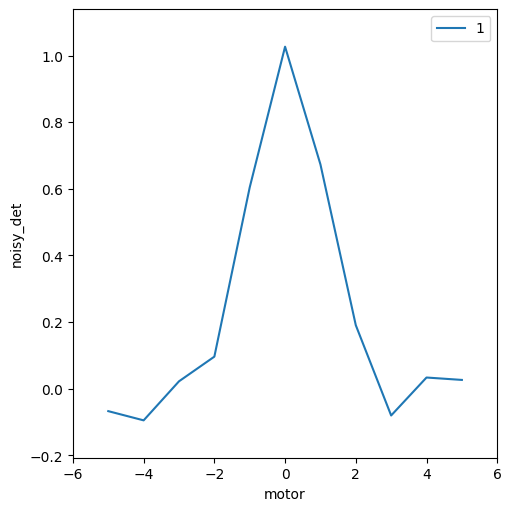

In [8]:
RE(bpp.pchain( mv(noisy_det.noise_multiplier, 0.1), scan([noisy_det], motor, -5, 5, 11) , mv(motor, 0) ) )

### Nice and Not So Nice Aspects of bpp.pchain 


<details><summary><b>Nice</b></summary>
    
- simple to assemble
    
- use `Cntl R` terminal search to re-use
    
- good way to test plans
</details>

<details><summary><b>Not So Nice</b></summary>
    
- hard to read/navigate, especially if many arguments are in `bpp.pchain()`
    
- even harder to manage multiple unique versions of `bpp.pchain()`
    
</details>

## Custom plan defintions

Let's make a custom plan to perform the last RE call.  We do this by making a python function.

But what did we just do?  **Don't scroll up.**

In [10]:
%history -n

   1: %run -i gm_user/user_profile.py
   2:
%run -i gm_user/user_startup.py  
%run -i gm_user/user_startup_afternoon.py
   3: RE.md["purpose"]
   4:
## Use to start item #1
temperature
   5: temperature.get()
   6: temperature.read()
   7: temperature.readback.read()["motor3"]["value"]
   8: RE(bpp.pchain( mv(noisy_det.noise_multiplier, 0.1), scan([noisy_det], motor, -5, 5, 11) , mv(motor, 0) ) )
   9:
def align_peak():
    yield from scan([noisy_det], motor, -5, 5, 11) 
    yield from mv(motor, 0)
  10: %history -n


In [11]:
%history -n 6-22

   6: temperature.read()
   7: temperature.readback.read()["motor3"]["value"]
   8: RE(bpp.pchain( mv(noisy_det.noise_multiplier, 0.1), scan([noisy_det], motor, -5, 5, 11) , mv(motor, 0) ) )
   9:
def align_peak():
    yield from scan([noisy_det], motor, -5, 5, 11) 
    yield from mv(motor, 0)
  10: %history -n
  11: %history -n 6-22


From the above, we can easily create a simple plan that will take **FULL** advantage of bluesky

In [12]:
def align_peak():
    yield from scan([noisy_det], motor, -5, 5, 11) 
    yield from mv(motor, 0)



Transient Scan ID: 2     Time: 2025-02-25 13:33:08
Persistent Unique Scan ID: 'd605335c-806b-4ca6-8422-37fd8e0f6574'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |      motor |  noisy_det |
+-----------+------------+------------+------------+
|         1 | 13:33:09.0 |     -5.000 |      0.035 |
|         2 | 13:33:09.0 |     -4.000 |      0.030 |
|         3 | 13:33:09.0 |     -3.000 |     -0.006 |
|         4 | 13:33:09.1 |     -2.000 |      0.124 |
|         5 | 13:33:09.2 |     -1.000 |      0.703 |
|         6 | 13:33:09.2 |      0.000 |      0.922 |
|         7 | 13:33:09.2 |      1.000 |      0.519 |
|         8 | 13:33:09.3 |      2.000 |      0.203 |
|         9 | 13:33:09.3 |      3.000 |      0.033 |
|        10 | 13:33:09.3 |      4.000 |      0.048 |
|        11 | 13:33:09.4 |      5.000 |      0.025 |
+-----------+------------+------------+------------+
generator scan ['d605335c'] (scan num: 2)





('d605335c-806b-4ca6-8422-37fd8e0f6574',)

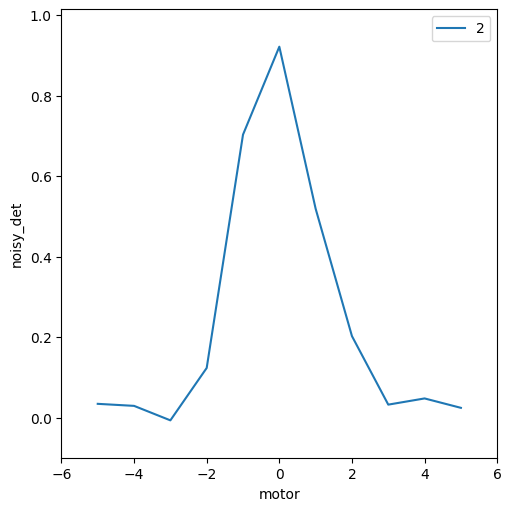

In [13]:
RE(align_peak())

## The problem in a real experiment

The peak will move as a function of temperature. In the next cells, we will:

1. Simulate our plan **before** using the RE.
2. Create a more robust plan for the specific experiment.

<div class="alert alert-block alert-info">
<b>Bluesky Feature:</b> There are two essential functions to inspect plans before calling them with the RE.
</div>


### Simulate

**Summarize the plan**

It's easy.  Just replace `RE` with `summarize_plan`.

In [ ]:
summarize_plan(align_peak())

`summarize_plan` is more for syntax checking and object verification.  It does not check if the plan is actually feasilble.

**Check the device software limits**

To do this, replace `summarize_plan` with `check_limits`

In [ ]:
check_limits(align_peak())

No errors and a returned prompt are a great sign!

## Position the motor on peak maximum

Bluesky has a built in feature called `bec.peaks` (best effort callbacks).

Try `bec.peaks` below and see what it is.  What python data structure does this resemble?

In [ ]:
bec.peaks

Try to extract `motor` position at the scan's maximum value for `noisy_det`:




<details><summary><b>Copy Paste Solution</b></summary>

    
```python

print(bec.peaks["max"]["noisy_det"][0])

RE(mv(motor, bec.peaks["max"]["noisy_det"][0]) )


```
</details>


For more details on [Peak Stats](https://blueskyproject.io/bluesky/callbacks.html#best-effort-callback) (i.e., `bec.peaks`) or the alternative [LiveFit](https://blueskyproject.io/bluesky/callbacks.html#callbacks-for-visualization-fitting).

Let's finish our function

In [ ]:
def align_peak():
    yield from scan([noisy_det], motor, -5, 5, 11) 
    yield from bps.sleep(3) #sometimes need this on actual hardware
    my_max = bec.peaks["max"]["noisy_det"][0]
    yield from mv(motor, my_max)

In [ ]:
summarize_plan(align_peak())

<div class="alert alert-block alert-warning">
<b>Caution:</b> Some beamlines have put effort into high level plans.
    
    
* Not all beamline specific plans are compatible with the bluesky.simulation module.
    
* Others have more automated alignment plans and those should be used as per the staff instructions.
</div>


### Assemble a super plan for our experiment
Our experiment's design is to:
1. align a peak at a given temperature
2. count at the signal maximum for some extended time (better statisics)
3. change temperature and repeat Steps 1 and 2

In [ ]:
RE(count([noisy_det], num = 1))

In [ ]:
def one_temperature():
    yield from align_peak()
    yield from count([noisy_det], 5)

Let's make sure this is correct by using `summarize_plan`.

Note:  We don't expect it to work.  Can you figure out what is wrong?  

<details><summary><b>Hint #1</b></summary>

If the traceback isn't all that useful.  Which functions `align_peak()` or `count()`  sets a python variable?
    
```python
align_peak??


```

</details>



<details><summary><b>Hint #2</b></summary>

Type `bec.peaks` after `RE(count([noisy_det], 5))`

```python
RE(count([noisy_det], 5))
bec.peaks

```

</details>


In [ ]:
summarize_plan(one_temperature())

## The cause of this failed `summarize_plan`

<details><summary><b>Solution</b></summary>

Not all plans are appropriate for `bec.peaks`.  `count()` is one of them.
    
Any time the `RE` is used and a "scan" is called, `bec.peaks` resets to wait for population at the end of the "scan".

Here, we could get around this problem by just doing this:
```python
RE(scan([noisy_det], motor, -.5, .5, 3) )
summarize_plan(one_temperature())
   
   
```


</details>

## Another common cause of failed `summarize_plan`

<details><summary><b>Solution</b></summary>

Performing a scan with a different detector before using `summarize_plan()`
    
```python
RE(scan([det], motor, -.5, .5, 3) )
print(bec.peaks)
summarize_plan(one_temperature())
   
   
```


</details>

## Robust use of `bec.peaks`

<div class="alert alert-block alert-info">
<b>Tip:</b> Don't be shy about adding print() inside functions to help with debugging.
</div>


In [ ]:
def align_peak():
    uid = yield from scan([noisy_det], motor, -5, 5, 11) 
    if uid is not None:
        #print('doing')
        yield from bps.sleep(3) #sometimes need this on actual hardware
        my_max = bec.peaks["max"]["noisy_det"][0]
        yield from mv(motor, my_max)
    #else:
        #print('passing')
        #pass

In [ ]:
RE(scan([det], motor, -.5, .5, 3) )
print(bec.peaks)

In [ ]:
summarize_plan(one_temperature())

<font color='green' size="6">Hosted by <font color='blue'><b>Josh</b></font></font>

### We have the major data collection plan

Let's iterate over some temperatures.

In [ ]:
for myT in [43, 45, 47, 50, 51, 52, 53, 54]:
    print(myT)

<div class="alert alert-block alert-info">
<b>Tip:</b> Easier ways to do this'
    
    - range()
    - "list comprehension"
</div>


## Create and test our overnight script
Try to modify the function below.

<details><summary><b>Solution</b></summary>

This represents my ideal solution.  There are variations of this that are also acceptable.

Copy and Paste the below in one cell to see the difference
    
```python
def my_experiment(myT_list):
    for myT in myT_list:
        print(f'Changing temperature to {myT}')
        yield from mv(temperature, myT)
        yield from one_temperature()
        print(f'\tFinished scans for temperature {myT}')

summarize_plan(my_experiment([31,]))
check_limits(my_experiment([31,]))
```


</details>

In [ ]:
## FIX THE FUNCTION
def my_experiment():
    yield from mv(temperature, ?)
    yield from one_temperature()

In [ ]:
summarize_plan(my_experiment())

In [ ]:
check_limits(my_experiment())

# Questions about the above?

## What's next



* [Good Night Bluesky](./Good%20Night%20Bluesky.ipynb)